**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

**Step 2: Loading the Dataset**

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset for ML/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**‘Sales’** is the target variable that needs to be predicted. Now, based on this data, our objective is to create a predictive model, that predicts sales based on the money spent on different platforms for marketi

In [3]:
#Drop the col Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Data Inspection**


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Data Cleaning**


In [7]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


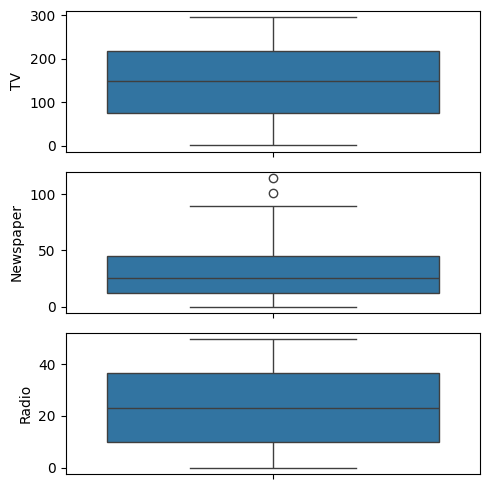

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

**Exploratory Data Analysis**

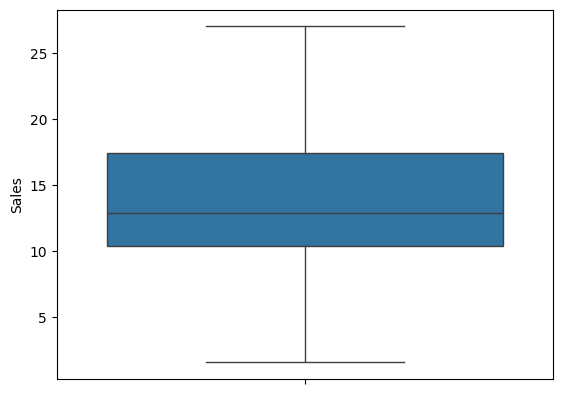

In [9]:
sns.boxplot(df['Sales'])
plt.show()

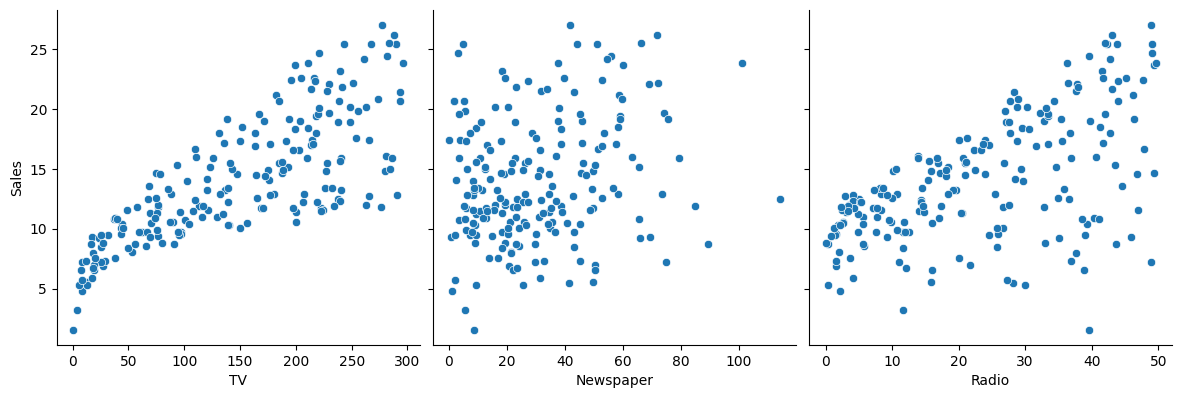

In [10]:
#to plot all the scatterplots in a single plot
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height = 4, kind = 'scatter' )
plt.show()

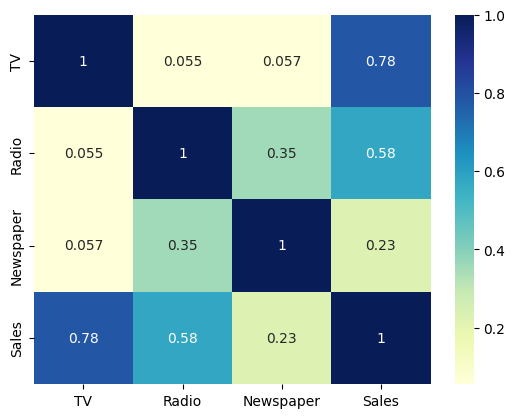

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

**Model Building**

**Performing Simple Linear Regression**

Equation of linear regression
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$


$y$ is the response
$c$ is the intercept
$m_1$ is the coefficient for the first feature
$m_n$ is the coefficient for the nth feature
In our case:


$y = c + m_1 \times TV$

The $m$ values are called the model coefficients or model parameters.

**Generic Steps in model building using statsmodels**

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [12]:
X=df['TV']
y=df['Sales']

In [13]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
# Let's now take a look at the train dataset
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [17]:
y_train.head()

,Sales
74,17.0
3,18.5
185,22.6
26,15.0
90,11.2


importing statmodels library to perform linear regression

In [18]:
import statsmodels.api as sm

In [19]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

,0
const,6.989666
TV,0.046497


Here, 6.989666 is the intercept, and 0.046497 is a slope for the variable TV.

In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           2.84e-30
Time:                        15:37:27   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

1.The coefficients and significance (p-values)
2.R-squared
3.F statistic and its significance

1. The coefficient for TV is 0.046497, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.613
Meaning that 61.3%   of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.989666 + 0.046497 \times TV $

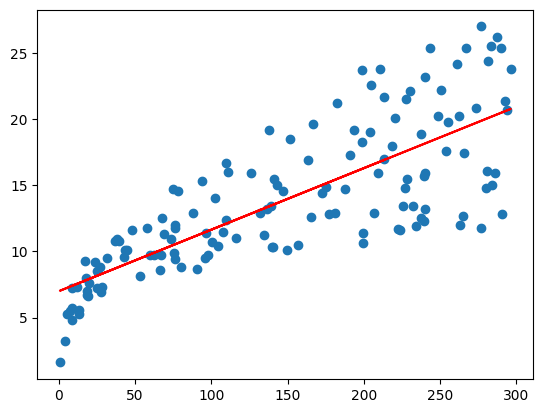

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.989666 + 0.046497*X_train, 'r')
plt.show()

**Model Evaluation**

Residual analysis

To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

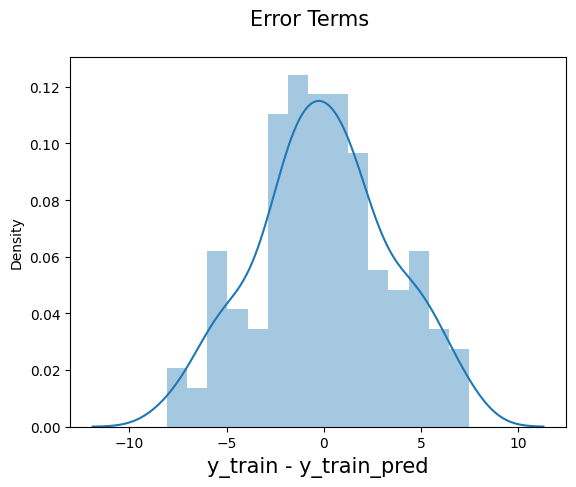

In [24]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

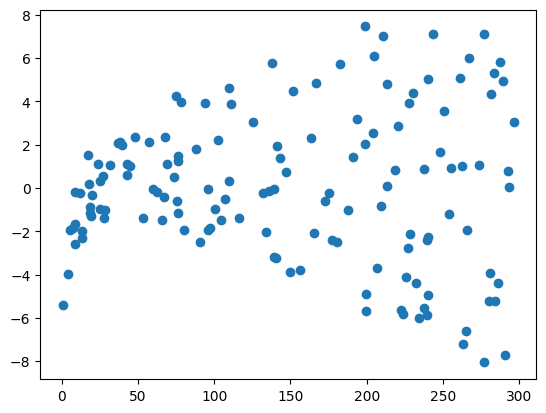

In [25]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [26]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [27]:
y_pred.head()

,0
126,7.352345
104,18.065337
99,13.276109
92,17.112141
111,18.228077


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [29]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.8241456288327003)

Checking the R-squared on the test set

In [30]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

Visualizing the fit on the test set

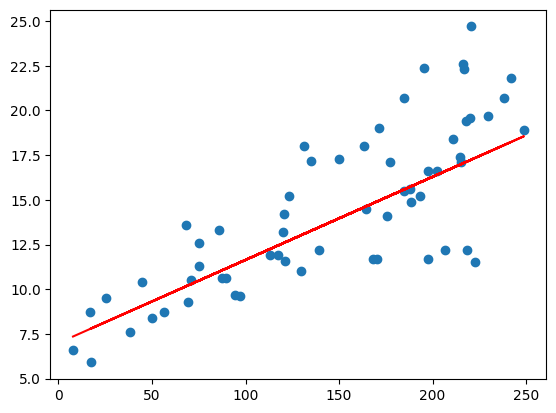

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.989666 + 0.046497*X_test, 'r')
plt.show()